In [4]:
import scraper as gs 
import pandas as pd 
import selenium 
path = "C:\Users\geral\Downloads\chromedriver_win32\chromedriver.exe"

df = gs.get_jobs('data science intern',100, False, path, 15)

df.to_csv('glassdoor_jobs.csv', index = False)

x out worked
Progress: 0/100
Progress: 1/100
Progress: 2/100
Progress: 3/100
Progress: 4/100
Progress: 5/100
Progress: 6/100
Progress: 7/100
Progress: 8/100
Progress: 9/100
Progress: 10/100
Progress: 11/100
Progress: 12/100
Progress: 13/100
Progress: 14/100
Progress: 15/100
Progress: 16/100
Progress: 17/100
Progress: 18/100
Progress: 19/100
Progress: 20/100
Progress: 21/100
Progress: 22/100
Progress: 23/100
Progress: 24/100
Progress: 25/100
Progress: 26/100
Progress: 27/100
Progress: 28/100
Progress: 29/100
 x out failed
Progress: 30/100
Progress: 31/100
Progress: 32/100
Progress: 33/100
Progress: 34/100
Progress: 35/100
Progress: 36/100
Progress: 37/100
Progress: 38/100
Progress: 39/100
Progress: 40/100
Progress: 41/100
Progress: 42/100
Progress: 43/100
Progress: 44/100
Progress: 45/100
Progress: 46/100
Progress: 47/100
Progress: 48/100
Progress: 49/100
Progress: 50/100
Progress: 51/100
Progress: 52/100
Progress: 53/100
Progress: 54/100
Progress: 55/100
Progress: 56/100
Progress: 57/1

In [10]:
gdj = pd.read_csv('glassdoor_jobs.csv',encoding='utf-8')
gdj.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,2021 Summer Intern (IT/Computer Science/Data S...,$71K-$118K (Glassdoor est.),Sorry no VISA sponsorship opportunities....inc...,3.2,MISO\n3.2,"Carmel, IN",-1,501 to 1000 Employees,1998,Nonprofit Organization,Energy,"Oil, Gas, Energy & Utilities",Unknown / Non-Applicable,-1
1,Data Science Intern,$71K-$118K (Glassdoor est.),Summer 2021\nShure offers a challenging and re...,4.1,Shure Incorporated\n4.1,"Niles, IL",-1,1001 to 5000 Employees,1925,Company - Private,Consumer Products Manufacturing,Manufacturing,Unknown / Non-Applicable,-1
2,Sr. Data Scientist,$71K-$118K (Glassdoor est.),Overview:\n\nMedifast is seeking a full-time S...,2.9,"Medifast, Inc.\n2.9","Baltimore, MD",-1,501 to 1000 Employees,1980,Company - Public,"Health, Beauty, & Fitness",Consumer Services,$500 million to $1 billion (USD),-1
3,Data Scientist,$71K-$118K (Glassdoor est.),"Publishers Clearing House (PCH), located in Je...",3.4,Publishers Clearing House\n3.4,"Jericho, NY",-1,501 to 1000 Employees,1953,Company - Private,Advertising & Marketing,Business Services,$500 million to $1 billion (USD),-1
4,Data Scientist (COVID-19) - ACESO,$71K-$118K (Glassdoor est.),Join the HJF Team!*\nHJF is seeking a *Data Sc...,3.5,The Henry M. Jackson Foundation\n3.5,"Bethesda, MD",-1,1001 to 5000 Employees,1983,Nonprofit Organization,Research & Development,Business Services,$100 to $500 million (USD),-1


In [70]:
gdj.drop(columns=['Headquarters','Competitors'], inplace=True)

In [23]:
!pip install bs4
import re
from bs4 import BeautifulSoup



  Using cached beautifulsoup4-4.9.1-py3-none-any.whl (115 kB)
  Using cached soupsieve-2.0.1-py3-none-any.whl (32 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1279 sha256=35b8e156a0894e7c7e1924be6616cdd403c929f9e73302f703d37afafbe7e2c6
  Stored in directory: c:\users\geral\appdata\local\pip\cache\wheels\0a\9e\ba\20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [49]:

def cleanData(col):
    """
    This logic removes any html tags like <p> etc from webscraped data
    any encoded data such as /aed/xoo for characters with accents or ect. will be decoded
    sans_unicode = eval(tags).decode("utf-8","replace")
    text = sans_unicode.replace("\n"," ").strip()
    """
    soup = BeautifulSoup(col, 'html.parser')
    tags = soup.get_text()
    text = tags.replace('\n',' ').strip()
    return text

In [50]:
gdj['Company Name'] = gdj['Company Name'].apply(cleanData)
gdj['Job Description'] = gdj['Job Description'].apply(cleanData)
gdj.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,2021 Summer Intern (IT/Computer Science/Data S...,$71K-$118K (Glassdoor est.),Sorry no VISA sponsorship opportunities....inc...,3.2,MISO 3.2,"Carmel, IN",-1,501 to 1000 Employees,1998,Nonprofit Organization,Energy,"Oil, Gas, Energy & Utilities",Unknown / Non-Applicable,-1
1,Data Science Intern,$71K-$118K (Glassdoor est.),Summer 2021 Shure offers a challenging and rew...,4.1,Shure Incorporated 4.1,"Niles, IL",-1,1001 to 5000 Employees,1925,Company - Private,Consumer Products Manufacturing,Manufacturing,Unknown / Non-Applicable,-1
2,Sr. Data Scientist,$71K-$118K (Glassdoor est.),Overview: Medifast is seeking a full-time Sen...,2.9,"Medifast, Inc. 2.9","Baltimore, MD",-1,501 to 1000 Employees,1980,Company - Public,"Health, Beauty, & Fitness",Consumer Services,$500 million to $1 billion (USD),-1
3,Data Scientist,$71K-$118K (Glassdoor est.),"Publishers Clearing House (PCH), located in Je...",3.4,Publishers Clearing House 3.4,"Jericho, NY",-1,501 to 1000 Employees,1953,Company - Private,Advertising & Marketing,Business Services,$500 million to $1 billion (USD),-1
4,Data Scientist (COVID-19) - ACESO,$71K-$118K (Glassdoor est.),Join the HJF Team!* HJF is seeking a *Data Sci...,3.5,The Henry M. Jackson Foundation 3.5,"Bethesda, MD",-1,1001 to 5000 Employees,1983,Nonprofit Organization,Research & Development,Business Services,$100 to $500 million (USD),-1


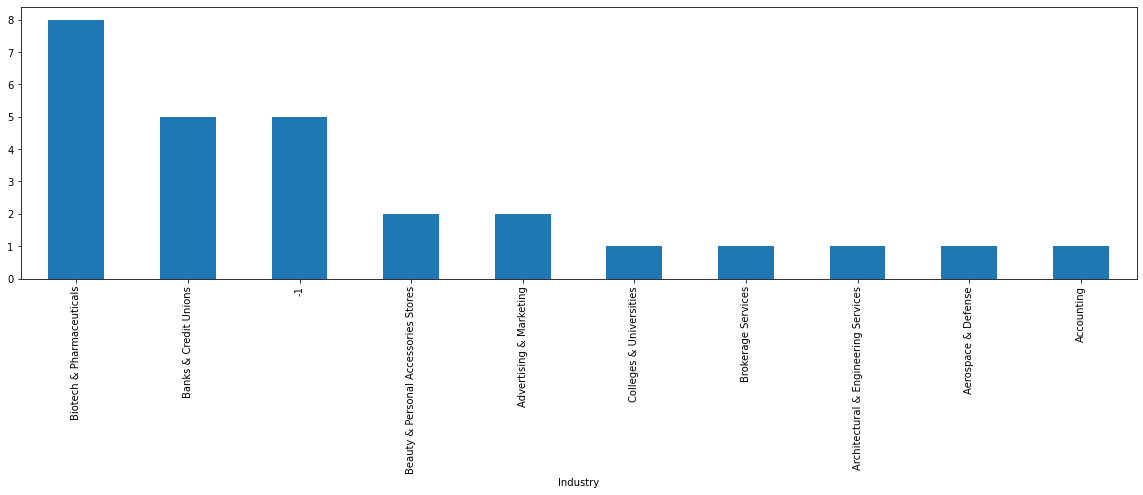

In [46]:
import matplotlib.pyplot as plt
counts = gdj.groupby("Industry").count()['Job Title'][:10].sort_values(ascending=False)[:10]
counts.plot(kind="bar",figsize=(20,5));


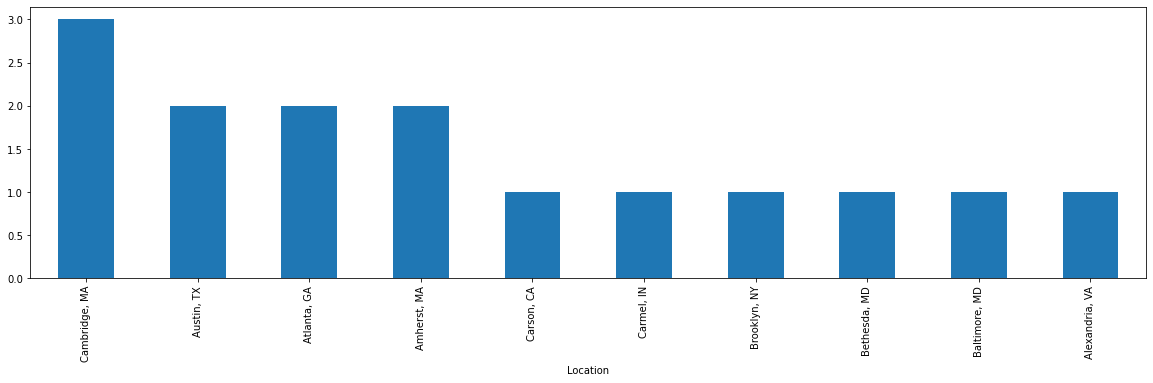

In [48]:
counts = gdj.groupby("Location").count()['Job Title'][:10].sort_values(ascending=False)[:10]
counts.plot(kind="bar",figsize=(20,5))

In [99]:
def regex_text(X):
    X = X.copy()
    X['Salary Estimate'] = X['Salary Estimate'].apply(lambda x : x.split('(')[0])
    X['Salary Estimate'] = X['Salary Estimate'].apply(lambda x : x.replace('K',"").replace('$',""))
    X['Salary Min'] = X['Salary Estimate'].apply(lambda x : x.split('-')[0])
    X['Salary Max'] = X['Salary Estimate'].apply(lambda x : x.split('-')[1])
    X['Company Name'] = X.apply(lambda x : x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-3], axis =1)
    X['State'] = X['Location'].apply(lambda x : x.split(",")[-1])
    return X

df = regex_text(gdj)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Min,Salary Max,State
0,2021 Summer Intern (IT/Computer Science/Data S...,71-118,Sorry no VISA sponsorship opportunities....inc...,3.2,MISO,"Carmel, IN",501 to 1000 Employees,1998,Nonprofit Organization,Energy,"Oil, Gas, Energy & Utilities",Unknown / Non-Applicable,71,118,IN
1,Data Science Intern,71-118,Summer 2021 Shure offers a challenging and rew...,4.1,Shure Incorporated,"Niles, IL",1001 to 5000 Employees,1925,Company - Private,Consumer Products Manufacturing,Manufacturing,Unknown / Non-Applicable,71,118,IL
2,Sr. Data Scientist,71-118,Overview: Medifast is seeking a full-time Sen...,2.9,"Medifast, Inc.","Baltimore, MD",501 to 1000 Employees,1980,Company - Public,"Health, Beauty, & Fitness",Consumer Services,$500 million to $1 billion (USD),71,118,MD
3,Data Scientist,71-118,"Publishers Clearing House (PCH), located in Je...",3.4,Publishers Clearing House,"Jericho, NY",501 to 1000 Employees,1953,Company - Private,Advertising & Marketing,Business Services,$500 million to $1 billion (USD),71,118,NY
4,Data Scientist (COVID-19) - ACESO,71-118,Join the HJF Team!* HJF is seeking a *Data Sci...,3.5,The Henry M. Jackson Foundation,"Bethesda, MD",1001 to 5000 Employees,1983,Nonprofit Organization,Research & Development,Business Services,$100 to $500 million (USD),71,118,MD


In [107]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Min,Salary Max,State
0,2021 Summer Intern (IT/Computer Science/Data S...,71-118,Sorry no VISA sponsorship opportunities....inc...,3.2,MISO,"Carmel, IN",501 to 1000 Employees,1998,Nonprofit Organization,Energy,"Oil, Gas, Energy & Utilities",$100 to $500 million (USD),71,118,IN
1,Data Science Intern,71-118,Summer 2021 Shure offers a challenging and rew...,4.1,Shure Incorporated,"Niles, IL",1001 to 5000 Employees,1925,Company - Private,Consumer Products Manufacturing,Manufacturing,Unknown / Non-Applicable,71,118,IL
2,Sr. Data Scientist,71-118,Overview: Medifast is seeking a full-time Sen...,2.9,"Medifast, Inc.","Baltimore, MD",501 to 1000 Employees,1980,Company - Public,"Health, Beauty, & Fitness",Consumer Services,$500 million to $1 billion (USD),71,118,MD
3,Data Scientist,71-118,"Publishers Clearing House (PCH), located in Je...",3.4,Publishers Clearing House,"Jericho, NY",501 to 1000 Employees,1953,Company - Private,Advertising & Marketing,Business Services,$500 million to $1 billion (USD),71,118,NY
4,Data Scientist (COVID-19) - ACESO,71-118,Join the HJF Team!* HJF is seeking a *Data Sci...,3.5,The Henry M. Jackson Foundation,"Bethesda, MD",1001 to 5000 Employees,1983,Nonprofit Organization,Research & Development,Business Services,$100 to $500 million (USD),71,118,MD


In [106]:
df.Revenue[0] = df.Revenue[0].replace('Unknown / Non-Applicable','$100 to $500 million (USD)')

In [86]:
df['Salary Min'].describe()

count     100
unique      4
top       106
freq       30
Name: Salary Min, dtype: object

In [ ]:
# Set options for pandas

def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

In [74]:
gdj['Salary Estimate'].unique()

array(['$71K-$118K (Glassdoor est.)', '$106K-$171K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$73K-$124K (Glassdoor est.)'],
      dtype=object)